# Theoretical



**Support Vector Machines (SVMs)**


### 1.  What is a Support Vector Machine (SVM)?

A Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks.  Its primary goal is to find the optimal hyperplane that maximally separates data points of different classes (in classification) or best fits the data (in regression).

Here's a breakdown of the key concepts:

* **Hyperplane:** In a two-dimensional space, a hyperplane is simply a line. In higher dimensions, it's a generalization of a line (e.g., a plane in 3D).  The hyperplane acts as the decision boundary.

* **Margin:** The margin is the distance between the hyperplane and the closest data points from each class.  SVMs aim to maximize this margin.  A larger margin generally leads to better generalization performance on unseen data.

* **Support Vectors:** These are the data points that lie closest to the hyperplane and are crucial for defining the margin and the hyperplane's orientation.  They "support" the hyperplane.  The decision boundary is entirely determined by the support vectors; other data points don't influence it.

* **Kernel Trick:**  SVMs can handle non-linearly separable data by using the kernel trick.  This technique maps the data to a higher-dimensional feature space where it becomes linearly separable.  The "trick" is that the kernel functions perform this mapping implicitly, without explicitly transforming the data, which is computationally efficient.

* **Regularization (C parameter):**  The C parameter controls the trade-off between maximizing the margin and minimizing the classification error.  A smaller C allows for a wider margin but might misclassify some points.  A larger C penalizes misclassifications more heavily, potentially leading to a narrower margin and overfitting.

In essence, SVMs try to find the "best" line (or hyperplane) to separate the data, where "best" is defined by maximizing the margin and, in the case of soft margin SVMs, balancing this with the cost of misclassifications.




### 2.  What is the difference between Hard Margin and Soft Margin SVM?

The key difference between Hard Margin and Soft Margin SVM lies in how they handle datasets that are *not* perfectly linearly separable.

*   **Hard Margin SVM:**

    *   **Assumption:** The data is perfectly linearly separable.  This means you can draw a straight line (or hyperplane in higher dimensions) that completely divides the classes with no overlap.
    *   **Goal:** Find the hyperplane that maximizes the margin while *perfectly* separating the classes.
    *   **Characteristics:**  Very sensitive to outliers.  If even one outlier is on the wrong side of the margin, the Hard Margin SVM might fail to find a solution or produce a very narrow margin.  It's not applicable to most real-world datasets, which almost always have some degree of overlap or noise.
    *   **Use Case:** Primarily theoretical; rarely used in practice due to its sensitivity to outliers.

*   **Soft Margin SVM:**

    *   **Assumption:** The data may not be perfectly linearly separable.  There might be overlapping points or outliers within the margin.
    *   **Goal:** Find the hyperplane that maximizes the margin while *allowing* for some misclassifications or points within the margin.  It balances maximizing the margin with minimizing the "cost" of these violations.
    *   **Characteristics:** More robust to outliers and noise.  It uses a "slack variable" (often denoted as ξ - xi) to measure the degree to which a data point violates the margin.  The C parameter (regularization parameter) controls the trade-off:
        *   **Small C:** Allows for more margin violations (wider margin, potentially more misclassifications).  Good for datasets with noise or overlapping classes where a perfect separation isn't possible or desirable.
        *   **Large C:** Penalizes margin violations more heavily (narrower margin, fewer misclassifications).  Good if you want to classify as many training examples correctly as possible, even at the cost of a smaller margin (but be careful of overfitting).
    *   **Use Case:**  Much more practical and widely used than Hard Margin SVM.  It's suitable for most real-world datasets where perfect linear separability is not achievable.

In simpler terms: Imagine trying to divide red and blue balls with a line. Hard Margin SVM insists you draw the line so that *no* balls are on the wrong side. Soft Margin SVM allows a few balls to be on the wrong side or even within the "no man's land" around the line, making the line more adaptable to a messy arrangement of balls. The C parameter controls how much you tolerate balls being in the wrong place.



### 3.  What is the mathematical intuition behind SVM?

The mathematical intuition behind SVM revolves around finding the optimal hyperplane that maximizes the margin while (in the case of soft margin SVM) minimizing classification errors. Let's break down the key concepts and how they're mathematically expressed:

**1. Defining the Hyperplane:**

A hyperplane in an *n*-dimensional space can be defined by the following equation:

```
w ⋅ x + b = 0
```

Where:

*   `w` is the weight vector (a vector perpendicular to the hyperplane).
*   `x` is a data point (a vector in *n*-dimensional space).
*   `b` is the bias (a scalar that shifts the hyperplane).

For classification, we want to find `w` and `b` such that:

*   `w ⋅ x + b >= +1` for positive class data points.
*   `w ⋅ x + b <= -1` for negative class data points.

**2. Defining the Margin:**

The margin is the distance between the hyperplane and the closest data points (the support vectors).  The width of the margin is given by `2 / ||w||`, where `||w||` is the Euclidean norm (magnitude) of the weight vector `w`.  Maximizing the margin is equivalent to minimizing `||w||`.

**3. The Optimization Problem (Hard Margin SVM):**

The goal of a Hard Margin SVM is to find `w` and `b` that:

*   Minimize: `(1/2) * ||w||^2`  (equivalent to minimizing `||w||`)
*   Subject to: `y_i * (w ⋅ x_i + b) >= 1` for all data points `x_i`, where `y_i` is the class label (+1 or -1).

This is a constrained optimization problem.

**4. The Optimization Problem (Soft Margin SVM):**

Soft Margin SVM introduces slack variables (`ξ_i`) to allow for misclassifications or points within the margin.  The goal is to find `w`, `b`, and `ξ_i` that:

*   Minimize: `(1/2) * ||w||^2 + C * Σ ξ_i`
*   Subject to: `y_i * (w ⋅ x_i + b) >= 1 - ξ_i` and `ξ_i >= 0` for all data points `x_i`.

Where:

*   `C` is the regularization parameter.  It controls the trade-off between maximizing the margin and minimizing the classification error (number of points violating the margin).

**5. Lagrange Multipliers:**

To solve these constrained optimization problems, the method of Lagrange multipliers is used.  This method converts the constrained problem into an unconstrained one by introducing Lagrange multipliers (α_i).  The optimization problem is then expressed in terms of `w`, `b`, and `α_i`.

**6. Dual Formulation:**

The optimization problem is often solved in its *dual* formulation.  The dual problem is easier to solve computationally and has the advantage that the data points appear only in the form of dot products (`x_i ⋅ x_j`). This is where the kernel trick comes in.

**7. The Kernel Trick:**

The kernel trick allows us to implicitly map the data to a higher-dimensional feature space using kernel functions `k(x_i, x_j) = φ(x_i) ⋅ φ(x_j)`, where `φ(x)` is the mapping function.  We don't need to explicitly calculate `φ(x)`; the kernel function does it for us.

**In summary:** The mathematical intuition behind SVM is to formulate the problem of finding the optimal separating hyperplane as a constrained optimization problem. Lagrange multipliers are used to solve this problem, and the kernel trick enables SVMs to work with non-linearly separable data by implicitly mapping the data to a higher-dimensional space. The solution involves finding the weight vector `w` and bias `b` that define the hyperplane, as well as the Lagrange multipliers, which are related to the support vectors.



### 4.  What is the role of Lagrange Multipliers in SVM?

Lagrange multipliers play a crucial role in Support Vector Machines (SVMs) by enabling us to solve the constrained optimization problem of finding the optimal hyperplane.  Here's a breakdown of their role:

1. **Constrained Optimization:** The core task in SVM is to find the hyperplane that maximizes the margin while (in soft margin SVM) minimizing classification errors. This is a *constrained optimization problem* because we have constraints on the values of the weight vector (`w`) and bias (`b`) based on the data points' class labels.  These constraints ensure that the data points are correctly classified (or, in soft margin SVM, that the margin violations are controlled).

2. **Converting to Unconstrained Problem:** The method of Lagrange multipliers is a mathematical technique that transforms a constrained optimization problem into an *unconstrained* one.  It does this by introducing new variables, the Lagrange multipliers (often denoted as α_i), and incorporating the constraints into the objective function.

3. **The Lagrangian:**  The Lagrangian is a function that combines the original objective function (e.g., minimizing `||w||^2`) and the constraints using the Lagrange multipliers.  The Lagrangian is constructed such that minimizing the Lagrangian with respect to `w` and `b` (and maximizing it with respect to the α_i) is equivalent to solving the original constrained optimization problem.

4. **Solving the Unconstrained Problem:**  The unconstrained optimization problem (in terms of the Lagrangian) is typically easier to solve using standard optimization techniques (e.g., taking derivatives and setting them to zero).

5. **Support Vectors:** The Lagrange multipliers (α_i) have a direct connection to the support vectors.  The α_i are non-zero *only* for the support vectors (the data points closest to the hyperplane).  This means that the optimal hyperplane is defined entirely by the support vectors.  The values of the α_i indicate the "importance" of each support vector in defining the hyperplane.

6. **Dual Formulation:**  The optimization problem in SVM is often solved in its *dual* formulation.  The dual formulation is derived using the Lagrangian and has several advantages:
    *   It's often computationally more efficient to solve.
    *   The data points appear only in the form of dot products, which is crucial for the kernel trick.

In summary, Lagrange multipliers are essential for:

*   Converting the constrained optimization problem of finding the optimal hyperplane into an unconstrained one.
*   Identifying the support vectors (data points with non-zero Lagrange multipliers).
*   Formulating the dual optimization problem, which is often easier to solve and enables the use of the kernel trick.



### 5.  What are Support Vectors in SVM?

Support Vectors are the most crucial data points in a Support Vector Machine (SVM). They are the data points that lie closest to the hyperplane and directly influence its position and orientation.  Here's a breakdown of their significance:

1. **Defining the Margin:** The margin in an SVM is determined by the distance between the hyperplane and the *closest* data points from each class. These closest data points are the Support Vectors.  The margin's width is directly related to the distance between the Support Vectors of the two classes.

2. **Hyperplane Determination:** The hyperplane's position and orientation are *entirely* determined by the Support Vectors.  If you were to remove all other data points (the non-support vectors), the hyperplane would remain the same.  The non-support vectors play no role in defining the decision boundary.

3. **Critical Data Points:** Support Vectors are the most "important" data points in the dataset in the context of the SVM. They are the most difficult data points to classify and are the ones that the SVM focuses on.

4. **Sparse Solution:**  SVMs produce a sparse solution, meaning that only a small subset of the data points (the Support Vectors) are used to define the decision boundary. This makes SVMs memory-efficient, especially for high-dimensional data.

5. **Connection to Lagrange Multipliers:** In the mathematical formulation of SVM, each data point is associated with a Lagrange multiplier (α_i).  The Lagrange multipliers are non-zero *only* for the Support Vectors. The magnitude of the Lagrange multiplier indicates the influence of that particular support vector on the decision boundary.

In simpler terms: Imagine you're trying to separate apples and oranges with a line. The Support Vectors are like the apples and oranges that are right on the border between the two groups.  They're the ones that are hardest to classify, and they're the ones that determine where you draw the line.  All the other apples and oranges further away from the border don't really matter for deciding where the line goes.



### 6.  What is a Support Vector Classifier (SVC)?

A Support Vector Classifier (SVC) is simply the application of a Support Vector Machine (SVM) algorithm specifically for **classification** tasks.  It's the version of SVM that you use when your goal is to categorize data points into different classes.

Think of it this way:  SVM is the general concept and the underlying algorithm. SVC is the specific tool you use when you want to build a classification model using the SVM principles.

Here's how SVC works in a nutshell:

1. **Input:** You provide the SVC with labeled training data, where each data point has a set of features and a corresponding class label.

2. **Hyperplane Finding:** The SVC algorithm finds the optimal hyperplane that best separates the data points of different classes.  "Optimal" means maximizing the margin between the classes while (in the case of soft-margin SVC) minimizing misclassifications.

3. **Kernel Trick (Optional):** If the data is not linearly separable, the SVC can use the kernel trick to map the data to a higher-dimensional space where it becomes linearly separable.

4. **Classification:** Once the hyperplane is found, you can use the SVC to classify new, unseen data points.  The SVC determines which side of the hyperplane a new data point falls on, and assigns it the corresponding class label.

So, in essence, SVC is the "classification version" of the SVM algorithm.  It's the tool you reach for when you want to use the power of SVMs to build a classifier.



### 7.  What is a Support Vector Regressor (SVR)?

A Support Vector Regressor (SVR) is the application of the Support Vector Machine (SVM) algorithm for **regression** tasks.  While SVMs are more commonly known for classification, SVR allows you to use the same underlying principles to predict continuous values.

Here's how SVR works:

1. **Epsilon-tube:** Instead of trying to find a hyperplane that separates classes, SVR defines an "epsilon-tube" around a function that best fits the data. The goal is to find a function where as many data points as possible fall within this tube. Epsilon (ε) is a parameter that controls the width of the tube.

2. **Finding the best fit:** SVR tries to find the function that best fits the data while keeping the number of data points outside the epsilon-tube as small as possible. This function can be linear or non-linear, depending on the kernel used.

3. **Kernel Trick:** Just like in SVC, SVR can use the kernel trick to map the data to a higher-dimensional space where it might be easier to find a linear relationship for regression.

4. **Support Vectors:** The data points that lie on or outside the epsilon-tube are the support vectors. They are the most important data points for determining the regression function.

In essence, SVR aims to find the "best" function to fit the data, where "best" is defined by having as many data points as possible within the epsilon-tube while keeping the function as smooth as possible.



### 8.  What is the Kernel Trick in SVM?

The Kernel Trick is a clever technique used in Support Vector Machines (SVMs) to efficiently handle non-linearly separable data.  It allows SVMs to operate in a high-dimensional feature space without actually having to transform the data into that space.  This is crucial because explicitly transforming the data can be computationally very expensive, or even impossible if the feature space is infinite-dimensional.

Here's a breakdown of the key concepts:

1. **Non-linearly Separable Data:**  Many real-world datasets are not linearly separable.  This means you can't draw a straight line (or hyperplane) to perfectly divide the data points into their respective classes.

2. **Mapping to Higher Dimensions:** The idea behind the kernel trick is that it's often easier to find a linear separation in a higher-dimensional space.  So, we want to map the data points from their original feature space to a higher-dimensional feature space where they become linearly separable.

3. **The Problem:** Explicitly mapping the data to this higher-dimensional space can be computationally very expensive.  Imagine you have thousands of data points, and each point gets mapped to a feature vector with millions of components.  The calculations would be very slow.

4. **The Solution: Kernel Functions:**  The kernel trick provides a way to achieve the same result *without* explicitly performing the mapping.  Instead of mapping the data points and then calculating the dot product between them in the higher-dimensional space, we use a *kernel function*.  The kernel function `k(x, x')` takes two data points `x` and `x'` as input and directly computes the dot product between their images in the higher-dimensional space, `φ(x) ⋅ φ(x')`, *without* actually calculating `φ(x)` and `φ(x')`.

5. **How it Works:**  The kernel function acts as a shortcut.  It implicitly performs the mapping and the dot product in one step, making the computation much more efficient.  We just replace the dot products in the SVM optimization problem with the kernel function.

6. **Examples of Kernel Functions:**  Common kernel functions include:
    *   **Linear Kernel:** `k(x, x') = x ⋅ x'` (This is equivalent to no mapping at all.)
    *   **Polynomial Kernel:** `k(x, x') = (x ⋅ x' + c)^d`
    *   **Radial Basis Function (RBF) Kernel:** `k(x, x') = exp(-||x - x'||^2 / (2σ^2))`

In essence, the kernel trick allows SVMs to work with complex, non-linearly separable data by using kernel functions to implicitly perform the mapping to a higher-dimensional space where linear separation is possible.  This avoids the computational burden of explicitly transforming the data.


### 9.  Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

Let's compare the Linear, Polynomial, and Radial Basis Function (RBF) kernels, commonly used in Support Vector Machines (SVMs):

**1. Linear Kernel:**

*   **Formula:** `k(x, x') = x ⋅ x'` (the dot product of x and x')
*   **Intuition:** This is the simplest kernel. It's equivalent to performing no mapping at all; the SVM operates directly in the original feature space. It assumes the data is linearly separable.  Think of it as trying to draw a straight line (or hyperplane) to separate the classes.
*   **Advantages:**
    *   Simple and fast to compute.
    *   Few parameters to tune (usually none).
*   **Disadvantages:**
    *   Only works for linearly separable data.
    *   Cannot capture complex non-linear relationships.
*   **Use Cases:** Suitable when the data is known to be linearly separable or when computational speed is a primary concern (e.g., very large datasets).

**2. Polynomial Kernel:**

*   **Formula:** `k(x, x') = (x ⋅ x' + c)^d` (where 'c' is a constant (often 0 or 1) and 'd' is the degree of the polynomial)
*   **Intuition:** Maps the data to a higher-dimensional space using polynomial combinations of the original features.  For example, if your original features are x1 and x2, a polynomial kernel of degree 2 might implicitly create features like x1^2, x2^2, and x1*x2. This allows the SVM to find non-linear decision boundaries in the original space.
*   **Advantages:**
    *   Can capture non-linear relationships.
    *   More flexible than the linear kernel.
*   **Disadvantages:**
    *   More computationally expensive than the linear kernel.
    *   Can be prone to overfitting if the degree 'd' is too high.
    *   Requires tuning of two parameters (c and d).
*   **Use Cases:** Can be used when the data is not linearly separable and some degree of non-linearity is expected.  However, RBF is often a better choice for non-linear data.

**3. Radial Basis Function (RBF) Kernel:**

*   **Formula:** `k(x, x') = exp(-||x - x'||^2 / (2σ^2))` or equivalently, `exp(-γ||x - x'||^2)` where γ (gamma) = 1/(2σ^2).  `||x - x'||` is the Euclidean distance between x and x'.
*   **Intuition:**  Maps the data to an *infinite*-dimensional feature space.  It's a very flexible kernel and can capture very complex non-linear relationships. It measures the similarity between two points; points close together have a kernel value close to 1, and points far apart have a kernel value close to 0.
*   **Advantages:**
    *   Very flexible and can capture highly complex non-linear relationships.
    *   Widely used and often performs very well in practice.
*   **Disadvantages:**
    *   More computationally expensive than the linear and often the polynomial kernel.
    *   Requires careful tuning of one parameter (σ or gamma).  Too small a gamma can lead to overfitting.
*   **Use Cases:** A good default choice for many datasets, especially when non-linearity is suspected. It's often a good idea to try the RBF kernel first and then consider other kernels if needed.

**Summary Table:**

| Feature          | Linear Kernel              | Polynomial Kernel        | RBF Kernel                  |
|-----------------|--------------------------|------------------------|---------------------------|
| Separability     | Linearly separable         | Non-linearly separable    | Non-linearly separable       |
| Complexity       | Simple                     | Medium                   | Complex                     |
| Computation      | Fast                       | Medium                   | Slow                        |
| Overfitting      | Low                        | Medium to High           | Medium to High              |
| Parameters       | None                       | `c`, `d`                 | `σ` (or `γ`)                |
| Use Cases        | Linearly separable data    | Some non-linearity        | General purpose, non-linear |

**Which Kernel to Choose?**

There's no single "best" kernel. The optimal choice depends on the specific dataset and the problem you're trying to solve.  It's often a matter of experimentation and cross-validation.  The RBF kernel is frequently a good starting point due to its flexibility.  If computational speed is paramount and you suspect linear separability, the linear kernel is a good choice.  Avoid polynomial kernels unless you have a strong reason to believe they are appropriate, as they can be prone to overfitting.  Always use cross-validation to select the best kernel and its parameters.



### 10. What is the effect of the C parameter in SVM?

The C parameter in Support Vector Machines (SVMs) is a crucial regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error (or, in regression, the error tolerance).  It influences how much the SVM prioritizes a large margin versus correctly classifying all training examples.

Here's a breakdown of its effects:

* **Margin vs. Misclassifications:**  The SVM's primary goal is to find a hyperplane that maximizes the margin.  However, sometimes, perfectly separating all training examples with a large margin is impossible (or leads to a very complex and potentially overfit decision boundary). The C parameter allows the SVM to make a compromise.

* **Small C (Weak Regularization):**
    *   Prioritizes a *larger margin*, even if it means misclassifying some training examples.
    *   Allows the SVM to be more tolerant to outliers and noise in the data.
    *   Can lead to a simpler decision boundary.
    *   May underfit the data if C is too small.

* **Large C (Strong Regularization):**
    *   Tries to classify *all* training examples correctly, even if it means having a *smaller margin*.
    *   Penalizes misclassifications (or points within the margin) heavily.
    *   Can lead to a more complex decision boundary that fits the training data very closely.
    *   May overfit the data, performing poorly on unseen examples.

* **Analogy:** Imagine you're trying to draw a line to separate two groups of students (e.g., those who like pizza and those who don't).

    *   **Small C:** You're okay with a few pizza-lovers being on the "don't like pizza" side, as long as you can draw a nice, clear line that broadly separates the groups.
    *   **Large C:** You're *very* strict. You want *no one* on the wrong side of the line, even if it means drawing a very wiggly, complicated line that might not work well for new students.

* **Choosing the Right C:** The optimal value of C depends on the specific dataset and the problem. It's typically chosen using techniques like cross-validation. You try different values of C and see which one gives the best performance on a held-out validation set.

* **Soft Margin SVM:** The C parameter is particularly important in *soft margin* SVMs, which are used when the data is not perfectly linearly separable. In this case, C directly controls the amount of "slack" allowed in the margin.

In summary, the C parameter is a key control knob for balancing the margin size and the number of misclassifications.  A small C favors a larger margin and can be more robust to noise, while a large C tries to minimize misclassifications and can lead to overfitting.


### 11. What is the role of the Gamma parameter in RBF Kernel SVM?

The gamma parameter (γ) in a Support Vector Machine (SVM) using the Radial Basis Function (RBF) kernel plays a crucial role in controlling the *width* of the radial basis function and, consequently, the influence of individual data points on the decision boundary.  It significantly affects the model's complexity and its tendency to overfit.

Here's a breakdown of gamma's effects:

* **RBF Width:** Gamma is inversely proportional to the square of the width (σ) of the RBF: γ = 1 / (2σ²).  So, a larger gamma means a narrower RBF, and a smaller gamma means a wider RBF.

* **Influence of Data Points:**

    * **Small Gamma (Wide RBF):** A small gamma makes the RBF wider. This means that each data point has a larger region of influence. The decision boundary tends to be smoother, as it's influenced by a broader range of data points.  The model is less sensitive to individual data points.

    * **Large Gamma (Narrow RBF):** A large gamma makes the RBF narrower.  This means that each data point has a smaller region of influence. The decision boundary becomes more localized and can be highly sensitive to individual data points, potentially leading to a very complex and wiggly boundary.

* **Model Complexity:**

    * **Small Gamma:**  Leads to a simpler model with a smoother decision boundary.  The model is less likely to overfit.  It might underfit if gamma is too small.

    * **Large Gamma:** Leads to a more complex model with a more intricate decision boundary. The model is more likely to overfit the training data.

* **Overfitting:**  A very large gamma can cause the SVM to essentially memorize the training data, leading to overfitting.  The decision boundary becomes highly sensitive to the training data and might not generalize well to unseen data.

* **Analogy:** Imagine you're trying to fit a curve to a set of data points.

    * **Small Gamma:** You're using a wide, smooth brush. The curve you draw will be influenced by many nearby points, resulting in a smooth fit.
    * **Large Gamma:** You're using a very fine-tipped pen. You can draw a very intricate curve that passes through every single point, but it might be very wiggly and not generalize well to new data.

* **Choosing the Right Gamma:**  Like the C parameter, the optimal value of gamma is typically chosen using cross-validation.  You try different values of gamma and see which one gives the best performance on a held-out validation set.  It's often tuned in conjunction with the C parameter.

In summary, gamma controls the "reach" of each data point's influence on the decision boundary.  A small gamma creates a smoother boundary, while a large gamma creates a more complex, potentially overfit boundary.  Careful tuning of gamma (often along with C) is essential for getting good performance with RBF kernel SVMs.



**Naïve Bayes Classifier**



### 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?

The Naïve Bayes classifier is a probabilistic machine learning algorithm used primarily for classification tasks. It's based on Bayes' theorem, a fundamental concept in probability theory, and is particularly well-suited for high-dimensional data like text classification.

Here's a breakdown:

* **Probabilistic Classifier:** Naïve Bayes calculates the probability of a data point belonging to a particular class, given its features.  It then assigns the data point to the class with the highest probability.

* **Bayes' Theorem:** The classifier uses Bayes' theorem to calculate these conditional probabilities.  Bayes' theorem allows us to update our belief about the probability of an event (a class) based on new evidence (the features).

* **"Naïve" Assumption:** The classifier is called "naïve" because it makes a simplifying assumption: it assumes that the features are *conditionally independent* of each other, given the class.  In other words, it assumes that the presence or absence of one feature does not affect the presence or absence of another feature, *given that we know the class*.

    * **Example:** In text classification, a Naïve Bayes classifier might assume that the presence of the word "movie" is independent of the presence of the word "exciting," given that we know the document is a review of a film.  This is clearly not true in reality (the words are likely correlated), but it simplifies the calculations significantly.

* **Why the Naïve Assumption is Useful:**  While the feature independence assumption is often unrealistic, it makes the Naïve Bayes classifier computationally very efficient.  It drastically reduces the number of parameters that need to be estimated, making it practical to use with high-dimensional data, such as text data with thousands of words.

* **Types of Naïve Bayes:** There are different types of Naïve Bayes classifiers, each suited for different types of data:
    * **Gaussian Naïve Bayes:** Used for continuous features that are assumed to be normally distributed (Gaussian).
    * **Multinomial Naïve Bayes:** Used for discrete features, such as word counts in text classification.
    * **Bernoulli Naïve Bayes:** Used for binary or boolean features (e.g., presence/absence of a word).

In summary, the Naïve Bayes classifier is a probabilistic classifier based on Bayes' theorem and a "naïve" assumption of feature independence.  This assumption simplifies the calculations, making it efficient for high-dimensional data, and often leads to surprisingly good performance in practice, especially in text classification.


### 13. What is Bayes’ Theorem?

Bayes' Theorem is a fundamental concept in probability theory that describes how to update the probability of a hypothesis (or belief) as new evidence becomes available. It provides a way to calculate conditional probabilities, specifically how the probability of an event A changes given that event B has occurred, and vice-versa.

The theorem is expressed mathematically as:

```
P(A|B) = [P(B|A) * P(A)] / P(B)
```

Where:

*   **P(A|B):**  This is the *posterior probability* of event A occurring given that event B has occurred.  It's what we want to calculate – how our belief in A is updated after observing B.
*   **P(B|A):** This is the *likelihood* of event B occurring given that event A has occurred. It measures how likely we are to observe B if A is true.
*   **P(A):** This is the *prior probability* of event A occurring. It's our initial belief about the probability of A *before* we consider the evidence B.
*   **P(B):** This is the *prior probability* of event B occurring.  It's often called the *evidence* or *normalizing constant*.  It ensures that the posterior probability is a valid probability (i.e., between 0 and 1).

**In simpler terms:** Bayes' Theorem helps us answer questions like: "If I observe B, how much should I change my belief about A?"

**Example:**

Let's say we're dealing with a medical test for a rare disease.

*   A = You have the disease.
*   B = The test comes back positive.

Bayes' Theorem can help us calculate P(A|B), the probability that you *actually have the disease* given that the test came back positive.  This is different from P(B|A), the probability that the test comes back positive *if you have the disease*, which is what the test's sensitivity tells us.  Because the disease is rare, the prior probability P(A) (the probability of having the disease before the test) is low.  Even if the test is quite accurate (P(B|A) is high), the posterior probability P(A|B) might still be relatively low because of the low prior probability.

**Key Applications:**

Bayes' Theorem is used in various fields, including:

*   **Machine Learning:**  Naïve Bayes classifiers, spam filtering, medical diagnosis.
*   **Statistics:** Bayesian inference, updating beliefs based on data.
*   **Artificial Intelligence:**  Reasoning under uncertainty.
*   **Finance:** Risk assessment.

In essence, Bayes' Theorem provides a formal way to update our beliefs in the face of new evidence. It's a powerful tool for reasoning under uncertainty.


### 14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes are all variants of the Naïve Bayes classifier, each designed to handle different types of data and feature distributions. The key difference between them lies in the *assumed distribution* of the features.

Here's a breakdown:

**1. Gaussian Naïve Bayes:**

*   **Assumption:** The features are continuous and follow a Gaussian (normal) distribution.  This means that the probability of a feature value given a class is modeled using the Gaussian probability density function.
*   **Use Case:** Best suited for continuous data where you expect the features to be approximately normally distributed.  Examples include:
    *   Image data (pixel intensities)
    *   Financial data (stock prices, etc.)
    *   Other continuous measurements

*   **Probability Calculation:**  The probability of a feature `x_i` given class `c` is calculated using the Gaussian probability density function:

    ```
    P(x_i | c) = (1 / sqrt(2 * pi * σ_c^2)) * exp(-(x_i - μ_c)^2 / (2 * σ_c^2))
    ```

    Where:
    *   `μ_c` is the mean of feature `x_i` for class `c`.
    *   `σ_c^2` is the variance of feature `x_i` for class `c`.

**2. Multinomial Naïve Bayes:**

*   **Assumption:** The features are discrete (represent counts).  This is typical for text data where features represent the frequency or count of words in a document. It assumes that the features follow a multinomial distribution.
*   **Use Case:** Primarily used for text classification and other problems where features represent counts.  Examples include:
    *   Document classification (spam/not spam, topic classification)
    *   Word frequency analysis

*   **Probability Calculation:** The probability of a feature `x_i` (word count) given class `c` is calculated using the multinomial distribution:

    ```
    P(x_i | c) = (N_ic + α) / (N_c + α * V)
    ```

    Where:
    *   `N_ic` is the count of feature `x_i` in class `c` in the training data.
    *   `N_c` is the total count of all features in class `c` in the training data.
    *   `V` is the number of unique features (vocabulary size).
    *   `α` is a smoothing parameter (Laplace smoothing) to prevent zero probabilities.

**3. Bernoulli Naïve Bayes:**

*   **Assumption:** The features are binary or boolean (represent presence/absence).  This is also common in text classification, where features might indicate whether a word is present in a document or not (regardless of its count). Assumes that the features follow a Bernoulli distribution.
*   **Use Case:**  Used for binary/boolean data. Examples:
    *   Document classification (word presence/absence)
    *   Other presence/absence indicators

*   **Probability Calculation:** The probability of a feature `x_i` (present or absent) given class `c` is calculated as:

    ```
    P(x_i | c) = p_ic  (if x_i is present)
    P(x_i | c) = 1 - p_ic (if x_i is absent)
    ```

    Where `p_ic` is the probability of feature `x_i` being present in class `c`.  This is estimated from the training data.

**Summary Table:**

| Variant             | Feature Type        | Distribution           | Use Case                                  |
| ------------------- | ------------------ | --------------------- | ----------------------------------------- |
| Gaussian Naïve Bayes | Continuous          | Gaussian (Normal)      | Continuous data, approximately normal     |
| Multinomial NB      | Discrete (Counts)  | Multinomial           | Text classification (word counts)           |
| Bernoulli NB        | Binary (Presence/Absence) | Bernoulli           | Text classification (word presence/absence) |

Choosing the right variant depends on the nature of your data.  If you have continuous data, Gaussian NB is a good choice.  For text data, Multinomial NB (for word counts) or Bernoulli NB (for word presence/absence) are commonly used.


### 15. When should you use Gaussian Naïve Bayes over other variants?

You should use Gaussian Naïve Bayes over other variants of Naïve Bayes (Multinomial or Bernoulli) when your features are **continuous** and you have reason to believe they approximately follow a **normal (Gaussian) distribution**.

Here's a more detailed breakdown:

1. **Continuous Data:** Gaussian Naïve Bayes is specifically designed for continuous features.  If your features represent measurements, quantities, or values that can take on a range of values (e.g., height, weight, temperature, pixel intensity), then Gaussian NB is a potential candidate.

2. **Normal Distribution (Approximation):** The key assumption of Gaussian NB is that the features, *within each class*, are normally distributed.  This means that the distribution of each feature, when you look at data points belonging to the same class, should resemble a bell curve.

    * **Important Note:** It's often okay if the data is *approximately* normally distributed.  Naïve Bayes is surprisingly robust to deviations from this assumption. However, if the data is heavily skewed or has a very different distribution, Gaussian NB might not be the best choice.

3. **When Not to Use Gaussian NB:**

    * **Discrete Features:** If your features are discrete (e.g., counts, categories, or binary values), Gaussian NB is not appropriate.  Use Multinomial NB for counts (like word frequencies) and Bernoulli NB for binary (presence/absence) features.
    * **Non-Normal Distributions:** If your continuous features are clearly not normally distributed (e.g., heavily skewed, multimodal), Gaussian NB might not be the best choice.  Consider transformations (like a logarithmic transformation) to make the data more normally distributed, or explore other classifiers that don't make this distributional assumption.

**In Summary:**

Use Gaussian Naïve Bayes when:

* Your features are continuous.
* You have some evidence (or a reasonable assumption) that the features, within each class, are approximately normally distributed.

If these conditions are not met, consider Multinomial NB (for counts), Bernoulli NB (for binary features), or other classification algorithms altogether.  It's always a good idea to visualize your data (histograms, density plots) to get a sense of the feature distributions before choosing a classifier.


### 16. What are the key assumptions made by Naïve Bayes?

The Naïve Bayes classifier rests on two key assumptions:

1. **Conditional Independence:** This is the "naïve" part.  It assumes that the features are *conditionally independent* of each other, *given the class*.  In simpler terms, it assumes that the presence or absence (or value) of one feature does not influence the presence or absence (or value) of any other feature, *given that you already know the class*.

   * **Example:** In a spam email classifier, the Naïve Bayes assumption would be that the presence of the word "free" is independent of the presence of the word "discount," *given that you already know the email is spam*.  This is clearly not true in reality (these words are likely correlated), but it's the simplifying assumption that makes Naïve Bayes computationally tractable.

2. **Equal Prior Probabilities (often):**  While not strictly required, many implementations of Naïve Bayes assume that the prior probabilities of each class are equal.  The prior probability of a class is the probability of that class occurring *before* you consider any features. If you don't have equal prior probabilities, you need to provide the prior probabilities for each class.

   * **Example:** If you're classifying images of cats and dogs, and you know beforehand that there are twice as many cat images as dog images in your dataset, you would specify these unequal prior probabilities. If you have no prior knowledge, you might assume equal prior probabilities.

**Why are these assumptions important?**

* **Computational Efficiency:** The conditional independence assumption dramatically simplifies the calculations required by Bayes' theorem. Without this assumption, you would need to estimate the joint probability distribution of all the features, which would be computationally very expensive, especially with many features.

* **Data Sparsity:**  In many real-world problems, especially with high-dimensional data (like text), you might not have enough training data to reliably estimate the joint probability distribution of the features.  The Naïve Bayes assumption helps to overcome this data sparsity problem.

**Are these assumptions realistic?**

Often, no. The features in real-world datasets are rarely truly independent. However, even when the independence assumption is violated, Naïve Bayes can still perform surprisingly well in practice. It often provides a good baseline for classification tasks, especially in text and other high-dimensional data.

**In summary:** Naïve Bayes assumes feature independence (given the class) and often assumes equal prior probabilities. These assumptions are simplifications that make the algorithm computationally efficient and help with data sparsity, but they are often not entirely true in real-world scenarios.  Despite this, Naïve Bayes is a useful and frequently effective classification algorithm.


### 17. What are the advantages and disadvantages of Naïve Bayes?

Let's break down the advantages and disadvantages of the Naïve Bayes classifier:

**Advantages:**

* **Simplicity and Ease of Implementation:** Naïve Bayes is conceptually simple and relatively easy to implement. The calculations involved are straightforward, making it a good starting point for classification tasks.

* **Computational Efficiency:** Due to the "naïve" assumption of feature independence, Naïve Bayes is computationally very efficient, especially compared to more complex algorithms.  This makes it suitable for large datasets and real-time applications.

* **Handles High-Dimensional Data Well:** Naïve Bayes performs well with high-dimensional data, such as text data with thousands of words. The simplifying assumptions help to mitigate the curse of dimensionality.

* **Good Performance in Many Real-World Scenarios:** Despite the unrealistic feature independence assumption, Naïve Bayes often achieves surprisingly good performance in practice, especially in text classification and other domains where the number of features is large.

* **Requires Relatively Little Training Data:**  Compared to some other algorithms, Naïve Bayes can often achieve decent performance with a relatively small amount of training data.

* **Easy to Interpret:** The probabilities calculated by Naïve Bayes can be relatively easy to interpret, providing insights into which features are most influential for each class.

**Disadvantages:**

* **The Naïve Assumption:** The biggest disadvantage is the "naïve" assumption that features are conditionally independent of each other, given the class.  This assumption is rarely true in real-world data.  Features are often correlated, and this can affect the accuracy of the probability estimates.

* **Zero Frequency Problem:** If a feature value is not observed in the training data for a particular class, the probability estimate for that feature-value pair will be zero. This can cause problems when the classifier encounters unseen feature values in the test data. Laplace smoothing (adding a small constant to all counts) is often used to mitigate this issue.

* **Sensitivity to Feature Representation:** Naïve Bayes can be sensitive to how the features are represented. For example, in text classification, using word counts (Multinomial NB) often performs better than using binary presence/absence indicators (Bernoulli NB), depending on the task.

* **Not Suitable for Complex Relationships:** Because it assumes feature independence, Naïve Bayes cannot capture complex relationships between features.  If the relationships between features are crucial for classification, other algorithms (like SVMs or decision trees) might be more appropriate.

* **Equal Prior Probabilities Assumption (often):**  If the prior probabilities of the classes are not equal, and you don't provide these prior probabilities, the classifier's performance can be affected.

**In summary:** Naïve Bayes is a simple, efficient, and often effective classification algorithm, particularly well-suited for high-dimensional data like text. However, its "naïve" assumption of feature independence can be a limitation, and it might not be the best choice for problems where complex relationships between features are important.  It's often a good baseline to try first, and then compare its performance to other algorithms if needed.


### 18. Why is Naïve Bayes a good choice for text classification?

Despite its "naïve" assumption, Naïve Bayes is often a surprisingly good choice for text classification due to a combination of factors:

1. **High Dimensionality:** Text data is inherently high-dimensional.  Each word in the vocabulary can be considered a feature, and the number of unique words in a corpus can be very large. Naïve Bayes handles high-dimensional data well.  The simplifying assumption of feature independence helps to mitigate the curse of dimensionality, allowing the model to learn effectively even with many features.

2. **Computational Efficiency:** Text datasets can be massive, containing millions of documents. Naïve Bayes is computationally very efficient, making it practical to train on large text corpora. The calculations involved are relatively simple, and the training process is fast.

3. **Robustness to Irrelevant Features:**  While the feature independence assumption is often violated in text data (words are clearly correlated), Naïve Bayes is surprisingly robust to the presence of irrelevant features.  Even if some words are not strongly related to the class being predicted, they usually don't significantly degrade the classifier's performance.

4. **Effective for Many Text Classification Tasks:**  Despite its simplicity, Naïve Bayes often achieves competitive performance in many real-world text classification tasks, such as:
    * Spam filtering
    * Sentiment analysis
    * Topic classification
    * Document categorization

5. **Handles Sparse Data Well:** Text data is often sparse.  Most documents contain only a small fraction of the total vocabulary. Naïve Bayes handles sparse data relatively well, as it doesn't require estimating the joint probability distribution of all the words.

6. **Easy to Implement and Interpret:** Naïve Bayes is straightforward to implement and the resulting model is relatively easy to interpret. The probabilities assigned to each word for each class can give insights into which words are most indicative of a particular category.

7. **Good Baseline:** Naïve Bayes is often used as a baseline model for text classification.  Its simplicity and efficiency make it a good starting point to compare against more complex models. If Naïve Bayes performs reasonably well, it might be sufficient for the task.  If it doesn't, it provides a benchmark against which to measure the improvements of other algorithms.

**In summary:** While the "naïve" assumption of feature independence is often not entirely true for text data, Naïve Bayes's computational efficiency, ability to handle high-dimensional and sparse data, and surprisingly good performance in many text classification tasks make it a popular and often effective choice.


### 19. Compare SVM and Naïve Bayes for classification tasks.

SVMs (Support Vector Machines) and Naïve Bayes are both popular classification algorithms, but they have different strengths and weaknesses. Here's a comparison to help you choose the right one for your task:

**SVMs (Support Vector Machines)**

* **Strengths:**
    * **Effective in high-dimensional spaces:** SVMs excel in situations where you have many features (e.g., text classification with a large vocabulary).
    * **Versatile due to Kernel Trick:** The kernel trick allows SVMs to model complex non-linear relationships between features, making them suitable for a wide range of datasets.
    * **Robust to Outliers:** Soft margin SVMs are less sensitive to outliers than some other algorithms.
    * **Good generalization performance:** SVMs often generalize well to unseen data, especially when the margin is maximized.

* **Weaknesses:**
    * **Computationally intensive:** Training SVMs can be computationally expensive, especially for large datasets.
    * **Parameter tuning:** SVMs have parameters (C, gamma for RBF kernel) that need to be tuned carefully, which can be time-consuming.
    * **Less interpretable:** SVMs can be less interpretable than Naïve Bayes, as it's harder to see which features are most important for the classification decision.

**Naïve Bayes**

* **Strengths:**
    * **Simple and fast:** Naïve Bayes is conceptually simple and computationally very efficient, making it suitable for large datasets and real-time applications.
    * **Handles high-dimensional data well:** Naïve Bayes performs well with high-dimensional data, such as text data.
    * **Requires less training data:** Naïve Bayes can often achieve good performance with a relatively small amount of training data.
    * **Easy to implement and interpret:** Naïve Bayes is straightforward to implement and the resulting model is relatively easy to interpret.

* **Weaknesses:**
    * **The "naïve" assumption:** The key weakness is the assumption that features are conditionally independent, which is often not true in real-world data.
    * **Zero frequency problem:** If a feature value is not observed in the training data for a particular class, the probability estimate for that feature-value pair will be zero. Laplace smoothing is used to mitigate this.
    * **Less accurate for complex relationships:** Naïve Bayes may not be the best choice when the relationships between features are complex and crucial for classification.

**When to use which?**

* **Use SVM when:**
    * You have high-dimensional data.
    * You suspect complex non-linear relationships between features.
    * You have enough computational resources.
    * Interpretability is not a primary concern.

* **Use Naïve Bayes when:**
    * You have a very large dataset.
    * Computational speed is critical.
    * You have limited training data.
    * You need a simple and interpretable model.
    * You have a good reason to believe that the feature independence assumption is reasonable (or that violating it won't be a major issue).

**In general:**

* Naïve Bayes is often a good starting point, especially for text classification.
* If Naïve Bayes doesn't perform well enough, or if you have reason to believe that feature dependencies are important, consider SVMs.
* Cross-validation is crucial for evaluating both models and tuning their parameters.

Ultimately, the best choice depends on your specific dataset, the problem you're trying to solve, and your priorities (e.g., speed, accuracy, interpretability).



### 20. How does Laplace Smoothing help in Naïve Bayes?

Laplace smoothing (also called add-one smoothing) is a technique used in Naïve Bayes classifiers to address the "zero frequency problem." This problem occurs when a particular feature value is not observed in the training data for a specific class.  Let's break down the issue and how Laplace smoothing helps:

**The Zero Frequency Problem:**

In Naïve Bayes, we calculate the probability of a feature given a class using the training data.  For example, in text classification, we might calculate the probability of a word appearing in a spam email.  If a particular word (e.g., "discount") never appears in any of the spam emails in our training data, its probability estimate for the "spam" class will be zero.

The problem arises when we encounter this word ("discount") in a *test* email.  Because the probability is zero, it can wipe out the entire probability calculation for that email, leading to incorrect classification.  Even if all other words strongly suggest that the email is spam, the zero probability can override everything.

**How Laplace Smoothing Helps:**

Laplace smoothing addresses this by adding a small constant (usually 1) to the count of every feature-value pair in the training data.  This ensures that no probability estimate ever becomes zero.

Here's how it works in the context of Multinomial Naïve Bayes (used for word counts):

Without smoothing:

```
P(word | class) = (Count of word in class) / (Total words in class)
```

With Laplace smoothing:

```
P(word | class) = (Count of word in class + 1) / (Total words in class + Vocabulary size)
```

By adding 1 to the word count and the vocabulary size to the denominator, we guarantee that even unseen words will have a non-zero probability.

**Benefits of Laplace Smoothing:**

* **Prevents Zero Probabilities:**  The primary benefit is that it prevents zero probabilities, avoiding the issue where a single unseen word can ruin the classification.
* **Improves Generalization:**  Smoothing can also slightly improve generalization performance by reducing the model's sensitivity to the specific words present in the training data.

**Why Add 1?**

Adding 1 is a common practice, but it's not strictly required.  You could add other small constants (e.g., 0.1, 0.5), and this is sometimes referred to as "add-k smoothing." However, add-one smoothing is often effective and widely used.

**In summary:** Laplace smoothing is a simple but effective technique to prevent zero probabilities in Naïve Bayes, improving the classifier's robustness and generalization performance, especially when dealing with sparse data like text.


# Practical


21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_linear = SVC(kernel='linear')
clf_rbf = SVC(kernel='rbf')

clf_linear.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)

y_pred_linear = clf_linear.predict(X_test)
y_pred_rbf = clf_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {accuracy_linear}")
print(f"RBF Kernel Accuracy: {accuracy_rbf}")

Linear Kernel Accuracy: 0.9814814814814815
RBF Kernel Accuracy: 0.7592592592592593


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.3489971413208723


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.


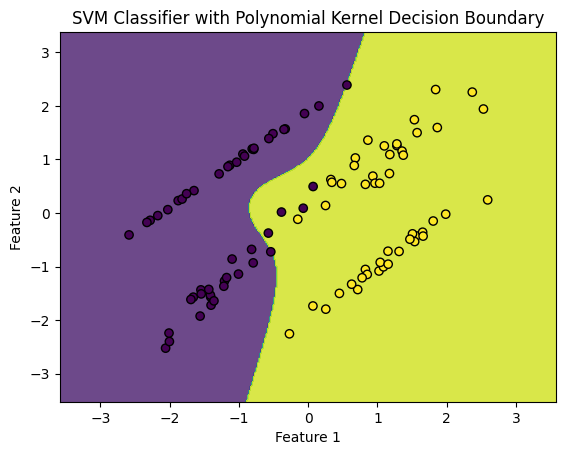

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM classifier with a polynomial kernel
clf = SVC(kernel='poly', degree=3, C=1.0)
clf.fit(X_train, y_train)

# Create a meshgrid for plotting the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class labels for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier with Polynomial Kernel Decision Boundary')
plt.show()




25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 0.9415204678362573


26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Fetch the 20 Newsgroups dataset
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)  # Fit and transform training data
X_test = vectorizer.transform(newsgroups_test.data)  # Transform test data

# Create a Multinomial Naïve Bayes classifier
mnb = MultinomialNB()

# Train the classifier
mnb.fit(X_train, newsgroups_train.target)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(newsgroups_test.target, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.8521617852161785



27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.


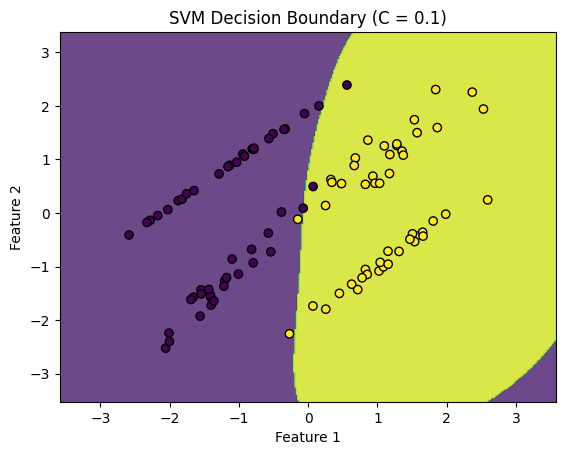

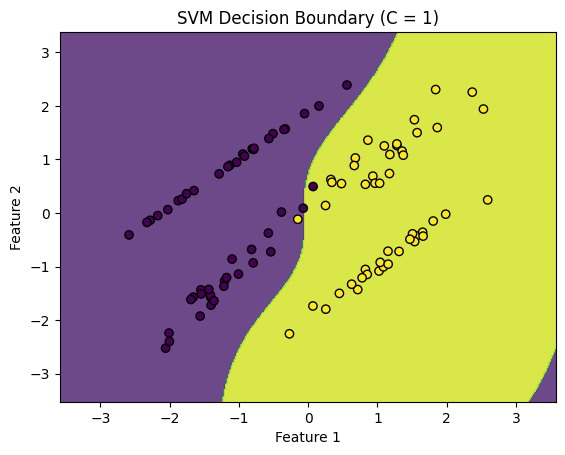

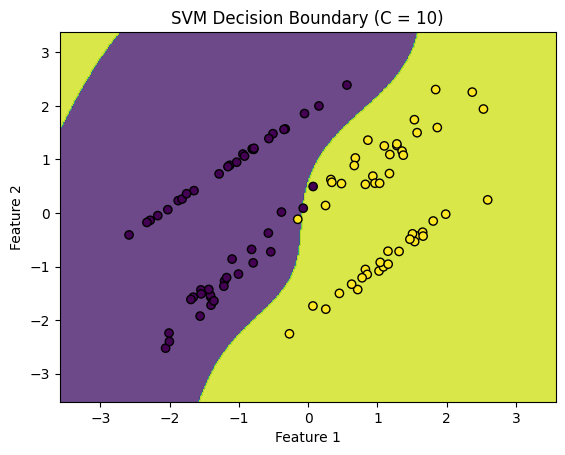

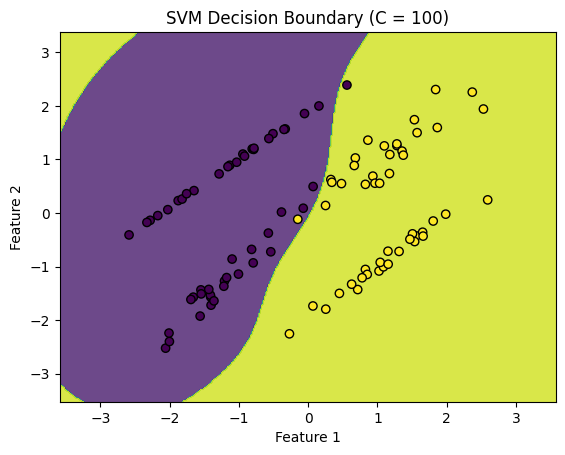

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C_values = [0.1, 1, 10, 100]

for C in C_values:
    clf = SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train)

    # Create meshgrid for plotting
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary (C = {C})')
    plt.show()



28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# 1. Load your data
# Example using make_classification to generate synthetic binary data:
X, y = make_classification(n_samples=100, n_features=10, n_informative=8, n_redundant=0,
                           n_classes=2, random_state=42)




# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create and train the Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# 4. Make predictions
y_pred = bnb.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 0.5333333333333333


29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load the data
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM models (one with scaled data, one without)
svm_unscaled = SVC(kernel='rbf')
svm_scaled = SVC(kernel='rbf')

svm_unscaled.fit(X_train, y_train)
svm_scaled.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred_unscaled = svm_unscaled.predict(X_test)
y_pred_scaled = svm_scaled.predict(X_test_scaled)

# 6. Evaluate the models
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy (Unscaled): {accuracy_unscaled}")
print(f"Accuracy (Scaled): {accuracy_scaled}")


Accuracy (Unscaled): 1.0
Accuracy (Scaled): 1.0


30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Gaussian Naïve Bayes model (without smoothing)
gnb_no_smoothing = GaussianNB()
gnb_no_smoothing.fit(X_train, y_train)

# 4. Train the Gaussian Naïve Bayes model (with smoothing)
gnb_smoothing = GaussianNB(var_smoothing=1e-9) # set smoothing, try different values
gnb_smoothing.fit(X_train, y_train)


# 5. Make predictions
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
y_pred_smoothing = gnb_smoothing.predict(X_test)

# 6. Compare Predictions (Qualitative)
print("Predictions without smoothing:", y_pred_no_smoothing[:10])  # Print first 10
print("Predictions with smoothing:", y_pred_smoothing[:10])

# 7. Evaluate (Quantitative - Accuracy)
from sklearn.metrics import accuracy_score
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
accuracy_smoothing = accuracy_score(y_test, y_pred_smoothing)

print(f"Accuracy without smoothing: {accuracy_no_smoothing}")
print(f"Accuracy with smoothing: {accuracy_smoothing}")


Predictions without smoothing: [1 0 0 1 1 0 0 0 1 1]
Predictions with smoothing: [1 0 0 1 1 0 0 0 1 1]
Accuracy without smoothing: 0.9415204678362573
Accuracy with smoothing: 0.9415204678362573


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# 1. Load the data
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Different C values to try
    'gamma': [1, 0.1, 0.01, 0.001],  # Different gamma values to try (for RBF kernel)
    'kernel': ['rbf', 'linear', 'poly']  # Different kernels to try
}

# 4. Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)  # cv=5 for 5-fold cross-validation

# 5. Fit the GridSearchCV object
grid.fit(X_train, y_train)

# 6. Print the best parameters
print(f"Best parameters: {grid.best_params_}")

# 7. Use the best model to make predictions on the test set
best_clf = grid.best_estimator_
y_pred = best_clf.predict(X_test)

# 8. Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check if it improves accuracy.


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight

# 1. Generate an imbalanced dataset
X, y = make_classification(n_samples=100, n_features=10, n_informative=8, n_redundant=0,
                           n_classes=2, weights=[0.9, 0.1], random_state=42) # 90% class 0, 10% class 1



# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights)) # Convert to dictionary

# 4. Train SVM models (one with class weights, one without)
svm_unweighted = SVC(kernel='rbf')  # or your chosen kernel
svm_weighted = SVC(kernel='rbf', class_weight=class_weight_dict)

svm_unweighted.fit(X_train, y_train)
svm_weighted.fit(X_train, y_train)

# 5. Make predictions
y_pred_unweighted = svm_unweighted.predict(X_test)
y_pred_weighted = svm_weighted.predict(X_test)

# 6. Evaluate the models
accuracy_unweighted = accuracy_score(y_test, y_pred_unweighted)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Accuracy (Unweighted): {accuracy_unweighted}")
print(f"Accuracy (Weighted): {accuracy_weighted}")



Accuracy (Unweighted): 0.9
Accuracy (Weighted): 0.9


33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# 1. Sample Email Data
sample_data = {
    'text': [
        "Free offer! Click here now!",
        "Meeting agenda for tomorrow",
        "Congratulations, you've won a prize!",
        "Project update discussion",
        "Limited time discount on software",
        "Re: Your application for the job",
        "Get rich quick scheme",
        "Team lunch arrangements",
        "Urgent: Action required",
        "Feedback on the presentation"
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 for spam, 0 for not spam
}
email_data = pd.DataFrame(sample_data)
X = email_data['text']
y = email_data['label']

# 2. Split the data (stratify is *very* important)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Train the Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# 5. Make predictions
y_pred = nb_classifier.predict(X_test_vec)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the SVM classifier
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_scaled, y_train)

# 5. Train the Naïve Bayes classifier
nb_clf = GaussianNB()  # Or another suitable Naïve Bayes variant
nb_clf.fit(X_train, y_train)  # Naïve Bayes usually doesn't need scaling

# 6. Make predictions
y_pred_svm = svm_clf.predict(X_test_scaled)
y_pred_nb = nb_clf.predict(X_test)

# 7. Evaluate the models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {accuracy_svm}")
print(f"Naïve Bayes Accuracy: {accuracy_nb}")




SVM Accuracy: 0.9766081871345029
Naïve Bayes Accuracy: 0.9415204678362573


35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Feature Selection (SelectKBest with f_classif is a common choice)
k = 10  # Number of best features to select (experiment with different values)
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)  # Fit and transform training data
X_test_selected = selector.transform(X_test)  # Transform test data

# 4. Train Naïve Bayes models (one with all features, one with selected features)
nb_all_features = GaussianNB()
nb_selected_features = GaussianNB()

nb_all_features.fit(X_train, y_train)
nb_selected_features.fit(X_train_selected, y_train)

# 5. Make predictions
y_pred_all = nb_all_features.predict(X_test)
y_pred_selected = nb_selected_features.predict(X_test_selected)

# 6. Evaluate the models
accuracy_all = accuracy_score(y_test, y_pred_all)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy (All Features): {accuracy_all}")
print(f"Accuracy (Selected Features): {accuracy_selected}")



Accuracy (All Features): 0.9415204678362573
Accuracy (Selected Features): 0.9590643274853801


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.


In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

# 1. Load the data
wine = load_wine()
X = wine.data
y = wine.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the OvR classifier
ovr_clf = OneVsRestClassifier(SVC(kernel='rbf')) # Scaling is implicit here
ovr_clf.fit(X_train_scaled, y_train)

# 5. Train the OvO classifier
ovo_clf = OneVsOneClassifier(SVC(kernel='rbf')) # Scaling is implicit here
ovo_clf.fit(X_train_scaled, y_train)

# 6. Make predictions
y_pred_ovr = ovr_clf.predict(X_test_scaled)
y_pred_ovo = ovo_clf.predict(X_test_scaled)

# 7. Evaluate
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"One-vs-Rest Accuracy: {accuracy_ovr}")
print(f"One-vs-One Accuracy: {accuracy_ovo}")



One-vs-Rest Accuracy: 0.9814814814814815
One-vs-One Accuracy: 0.9814814814814815


37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train and evaluate SVMs with different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel)  # Use scaled data
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{kernel.capitalize()} Kernel Accuracy: {accuracy}")



Linear Kernel Accuracy: 0.9766081871345029
Poly Kernel Accuracy: 0.8947368421052632
Rbf Kernel Accuracy: 0.9766081871345029


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Scale the data (important for SVMs) - Scale before splitting for CV
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# 3. Set up Stratified K-Fold Cross-Validation
k = 5  # Number of folds (experiment with different values)
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)  # shuffle is very important

accuracies = []  # List to store accuracies for each fold

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 4. Train the SVM classifier
    clf = SVC(kernel='rbf')  # Or your chosen kernel
    clf.fit(X_train, y_train)

    # 5. Make predictions
    y_pred = clf.predict(X_test)

    # 6. Evaluate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 7. Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
print(f"Average Accuracy (Stratified K-Fold): {average_accuracy}")



Average Accuracy (Stratified K-Fold): 0.9754075454122031


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define different prior probabilities
prior_probabilities = [
    None,  # Use default prior probabilities (often equal priors)
    [0.9, 0.1],  # Example: 90% class 0, 10% class 1
    [0.1, 0.9],  # Example: 10% class 0, 90% class 1
    # Add more prior probabilities as needed
]

for priors in prior_probabilities:
    # 4. Train the Naïve Bayes classifier with specified priors
    nb_clf = GaussianNB(var_smoothing=1e-9) # add smoothing for better performance
    if priors is not None:
        nb_clf.priors = priors  # Set the priors if they are not None
    nb_clf.fit(X_train, y_train)

    # 5. Make predictions
    y_pred = nb_clf.predict(X_test)

    # 6. Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Priors: {priors}, Accuracy: {accuracy}")



Priors: None, Accuracy: 0.9415204678362573
Priors: [0.9, 0.1], Accuracy: 0.935672514619883
Priors: [0.1, 0.9], Accuracy: 0.9415204678362573


40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.


In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (Crucially, do this AFTER splitting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train a Linear SVM (essential for SelectFromModel)
linear_svm = SVC(kernel='linear', C=0.1)  # Choose an appropriate C value
linear_svm.fit(X_train_scaled, y_train)

# 5. Feature Selection (SelectFromModel)
model = SelectFromModel(linear_svm, prefit=True)  # The SVM is already fitted

X_train_selected = model.transform(X_train_scaled) # Use the scaled training data
X_test_selected = model.transform(X_test_scaled)   # Use the scaled test data

# 6. Train a new SVM (can be non-linear now) on the selected features
svm_final = SVC(kernel='rbf')  # You can use a different kernel now
svm_final.fit(X_train_selected, y_train)

# 7. Make predictions and evaluate
y_pred = svm_final.predict(X_test_selected)  # Use the scaled and selected test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9649122807017544


41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.


In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the SVM classifier
clf = SVC(kernel='rbf')  # Or your chosen kernel
clf.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test_scaled)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # For binary classification
recall = recall_score(y_test, y_pred)        # For binary classification
f1 = f1_score(y_test, y_pred)                # For binary classification

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



Accuracy: 0.9766081871345029
Precision: 0.9814814814814815
Recall: 0.9814814814814815
F1-Score: 0.9814814814814815


42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).


In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss  # Import log_loss
from sklearn.preprocessing import StandardScaler

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (Optional but often helpful for other models, not strictly needed for NB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)  # Can use scaled or unscaled data for NB

# 5. Make probability predictions (essential for log_loss)
y_prob = gnb.predict_proba(X_test)  # Get probabilities, not just class predictions

# 6. Evaluate using log_loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss}")


Log Loss: 0.48986013210958873


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.


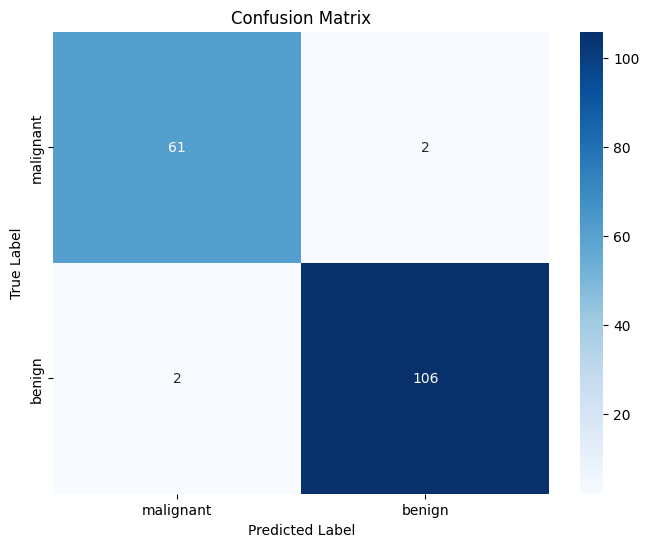

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the SVM classifier
clf = SVC(kernel='rbf')  # Or your chosen kernel
clf.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test_scaled)

# 6. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 7. Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.


In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error  # Import MAE
from sklearn.preprocessing import StandardScaler

# 1. Load the data
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the SVR model
svr = SVR(kernel='rbf')  # Or your chosen kernel
svr.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = svr.predict(X_test_scaled)

# 6. Evaluate using MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.3972059291578809


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.


In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score  # Import roc_auc_score
from sklearn.preprocessing import StandardScaler

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (Optional for NB, but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)  # Can use scaled or unscaled data for NB

# 5. Make probability predictions (essential for ROC-AUC)
y_prob = gnb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# 6. Evaluate using ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")


ROC-AUC Score: 0.9922104644326867


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

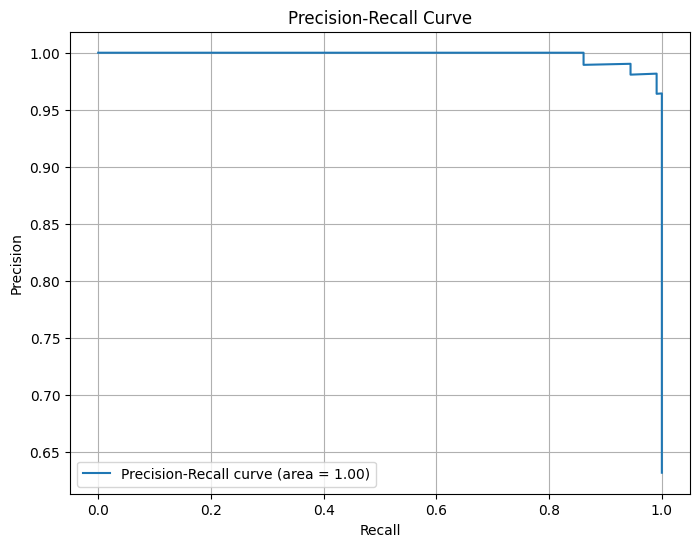

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc  # Import precision_recall_curve and auc
from sklearn.preprocessing import StandardScaler

# 1. Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the SVM classifier
clf = SVC(kernel='rbf', probability=True)  # probability=True is essential for PR curve
clf.fit(X_train_scaled, y_train)

# 5. Make probability predictions (needed for PR curve)
y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# 6. Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# 7. Calculate AUC-PR (Area Under the Precision-Recall Curve)
auc_pr = auc(recall, precision)

# 8. Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
